In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nifty50-stock-market-data/HDFCBANK.csv
/kaggle/input/nifty50-stock-market-data/GRASIM.csv
/kaggle/input/nifty50-stock-market-data/WIPRO.csv
/kaggle/input/nifty50-stock-market-data/stock_metadata.csv
/kaggle/input/nifty50-stock-market-data/BPCL.csv
/kaggle/input/nifty50-stock-market-data/INFY.csv
/kaggle/input/nifty50-stock-market-data/LT.csv
/kaggle/input/nifty50-stock-market-data/RELIANCE.csv
/kaggle/input/nifty50-stock-market-data/BRITANNIA.csv
/kaggle/input/nifty50-stock-market-data/INFRATEL.csv
/kaggle/input/nifty50-stock-market-data/HEROMOTOCO.csv
/kaggle/input/nifty50-stock-market-data/HINDUNILVR.csv
/kaggle/input/nifty50-stock-market-data/TATAMOTORS.csv
/kaggle/input/nifty50-stock-market-data/MM.csv
/kaggle/input/nifty50-stock-market-data/HDFC.csv
/kaggle/input/nifty50-stock-market-data/JSWSTEEL.csv
/kaggle/input/nifty50-stock-market-data/TITAN.csv
/kaggle/input/nifty50-stock-market-data/HINDALCO.csv
/kaggle/input/nifty50-stock-market-data/AXISBANK.csv
/kaggle/inpu

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Bidirectional


In [6]:
# Load the dataset
df = pd.read_csv('/kaggle/input/nifty50-stock-market-data/NIFTY50_all.csv')  # Adjust if file name or path differs
df_stock = df[df['Symbol'] == 'RELIANCE']  # Choose the stock of interest
data = df_stock['Close'].values
data = data.reshape(-1, 1)


In [8]:
# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


In [9]:
# Create the training and test datasets
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]


In [11]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)


In [13]:
look_back = 10
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)


In [14]:
# Reshape input to be [samples, time steps, features] for RNN and LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [15]:
# RNN Model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, input_shape=(look_back, 1)))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mean_squared_error')
rnn_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20


I0000 00:00:1726725646.714918      83 service.cc:145] XLA service 0x7edebc06ece0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726725646.714978      83 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 76/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0170

I0000 00:00:1726725647.457415      83 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0115
Epoch 2/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4279e-04
Epoch 3/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8963e-04
Epoch 4/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7071e-04
Epoch 5/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4634e-04
Epoch 6/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0818e-04
Epoch 7/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5385e-04
Epoch 8/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6164e-04
Epoch 9/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4523e-04
Epoch 10/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1292e-04
Epoch 11/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3164e-04
Epoch 12/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5145e-04
Epoch 13/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6157e-04
Epoch 14/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9978e-04
Epoch 15/20
133/

In [16]:
# Simple LSTM Model
vanilla_lstm_model = Sequential()
vanilla_lstm_model.add(LSTM(50, input_shape=(look_back, 1)))
vanilla_lstm_model.add(Dense(1))
vanilla_lstm_model.compile(optimizer='adam', loss='mean_squared_error')
vanilla_lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)


Epoch 1/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0206
Epoch 2/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2060e-04
Epoch 3/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.4182e-04
Epoch 4/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7154e-04
Epoch 5/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.1758e-04
Epoch 6/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.1213e-04
Epoch 7/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.3276e-04
Epoch 8/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.9614e-04
Epoch 9/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1441e-04
Epoch 10/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9999e-04
Epoch 11/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8349e-04
Epoch 12/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.4931e-04
Epoch 13/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.5422e-04
Epoch 14/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.6839e-04
Epoch

In [17]:
# Stacked LSTM Model
stacked_lstm_model = Sequential()
stacked_lstm_model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
stacked_lstm_model.add(LSTM(50, return_sequences=False))
stacked_lstm_model.add(Dense(1))
stacked_lstm_model.compile(optimizer='adam', loss='mean_squared_error')
stacked_lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)


Epoch 1/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0105
Epoch 2/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.7914e-04
Epoch 3/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.0632e-04
Epoch 4/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.6949e-04
Epoch 5/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.9658e-04
Epoch 6/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.9678e-04
Epoch 7/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.8923e-04
Epoch 8/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.7863e-04
Epoch 9/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.2473e-04
Epoch 10/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.9668e-04
Epoch 11/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.3863e-04
Epoch 12/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.1246e-04
Epoch 13/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.5455e-04
Epoch 14/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.5505e-04
Epoch

In [18]:
# Bidirectional LSTM Model
bidirectional_lstm_model = Sequential()
bidirectional_lstm_model.add(Bidirectional(LSTM(50, input_shape=(look_back, 1))))
bidirectional_lstm_model.add(Dense(1))
bidirectional_lstm_model.compile(optimizer='adam', loss='mean_squared_error')
bidirectional_lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)


Epoch 1/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0080
Epoch 2/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.9558e-04
Epoch 3/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.9045e-04
Epoch 4/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.1318e-04
Epoch 5/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.3475e-04
Epoch 6/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.9548e-04
Epoch 7/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.8157e-04
Epoch 8/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.2425e-04
Epoch 9/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.9808e-04
Epoch 10/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.1682e-04
Epoch 11/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.0440e-04
Epoch 12/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.3317e-04
Epoch 13/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.8083e-04
Epoch 14/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.1422e-04
Epoch

In [19]:
# Predictions
rnn_predictions = rnn_model.predict(X_test)
vanilla_lstm_predictions = vanilla_lstm_model.predict(X_test)
stacked_lstm_predictions = stacked_lstm_model.predict(X_test)
bidirectional_lstm_predictions = bidirectional_lstm_model.predict(X_test)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [20]:
# Inverse transform predictions
rnn_predictions = scaler.inverse_transform(rnn_predictions)
vanilla_lstm_predictions = scaler.inverse_transform(vanilla_lstm_predictions)
stacked_lstm_predictions = scaler.inverse_transform(stacked_lstm_predictions)
bidirectional_lstm_predictions = scaler.inverse_transform(bidirectional_lstm_predictions)
y_test_inverse = scaler.inverse_transform([y_test])


In [21]:
# Evaluate the models
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred)
    return mae, rmse, mape


In [23]:
rnn_mae, rnn_rmse, rnn_mape = evaluate_model(y_test_inverse[0], rnn_predictions[:, 0])
vanilla_lstm_mae, vanilla_lstm_rmse, vanilla_lstm_mape = evaluate_model(y_test_inverse[0], vanilla_lstm_predictions[:, 0])
stacked_lstm_mae, stacked_lstm_rmse, stacked_lstm_mape = evaluate_model(y_test_inverse[0], stacked_lstm_predictions[:, 0])
bidirectional_lstm_mae, bidirectional_lstm_rmse, bidirectional_lstm_mape = evaluate_model(y_test_inverse[0], bidirectional_lstm_predictions[:, 0])


In [24]:
# Print the metrics
print(f"RNN - MAE: {rnn_mae}, RMSE: {rnn_rmse}, MAPE: {rnn_mape}")
print(f"Vanilla LSTM - MAE: {vanilla_lstm_mae}, RMSE: {vanilla_lstm_rmse}, MAPE: {vanilla_lstm_mape}")
print(f"Stacked LSTM - MAE: {stacked_lstm_mae}, RMSE: {stacked_lstm_rmse}, MAPE: {stacked_lstm_mape}")
print(f"Bidirectional LSTM - MAE: {bidirectional_lstm_mae}, RMSE: {bidirectional_lstm_rmse}, MAPE: {bidirectional_lstm_mape}")


RNN - MAE: 22.674313618726213, RMSE: 40.060746077581626, MAPE: 0.016997798967234568
Vanilla LSTM - MAE: 28.658129348537106, RMSE: 50.47438748839028, MAPE: 0.021896108014750018
Stacked LSTM - MAE: 25.375742073676108, RMSE: 44.0563904918489, MAPE: 0.019030138719028703
Bidirectional LSTM - MAE: 25.324890032186605, RMSE: 45.4310170748876, MAPE: 0.019291894564028075


In [26]:
# Print actual vs predicted prices
def print_actual_vs_predicted(predictions, model_name):
    df_actual_vs_predicted = pd.DataFrame({
        'Actual': y_test_inverse[0],
        f'{model_name} Predicted': predictions[:, 0]
    })
    print(f"\n{model_name} Actual vs Predicted Prices:")
    print(df_actual_vs_predicted.head())


In [27]:
print_actual_vs_predicted(rnn_predictions, 'RNN')
print_actual_vs_predicted(vanilla_lstm_predictions, 'Vanilla LSTM')
print_actual_vs_predicted(stacked_lstm_predictions, 'Stacked LSTM')
print_actual_vs_predicted(bidirectional_lstm_predictions, 'Bidirectional LSTM')



RNN Actual vs Predicted Prices:
    Actual  RNN Predicted
0  1044.80    1032.893433
1  1045.20    1053.086670
2  1049.65    1054.311890
3  1043.50    1058.224731
4  1033.65    1054.093872

Vanilla LSTM Actual vs Predicted Prices:
    Actual  Vanilla LSTM Predicted
0  1044.80             1024.681396
1  1045.20             1030.982300
2  1049.65             1037.275635
3  1043.50             1043.380981
4  1033.65             1046.327881

Stacked LSTM Actual vs Predicted Prices:
    Actual  Stacked LSTM Predicted
0  1044.80             1021.145142
1  1045.20             1030.257080
2  1049.65             1037.245605
3  1043.50             1042.912354
4  1033.65             1043.334595

Bidirectional LSTM Actual vs Predicted Prices:
    Actual  Bidirectional LSTM Predicted
0  1044.80                   1025.284790
1  1045.20                   1033.901855
2  1049.65                   1040.554810
3  1043.50                   1046.131348
4  1033.65                   1046.795532


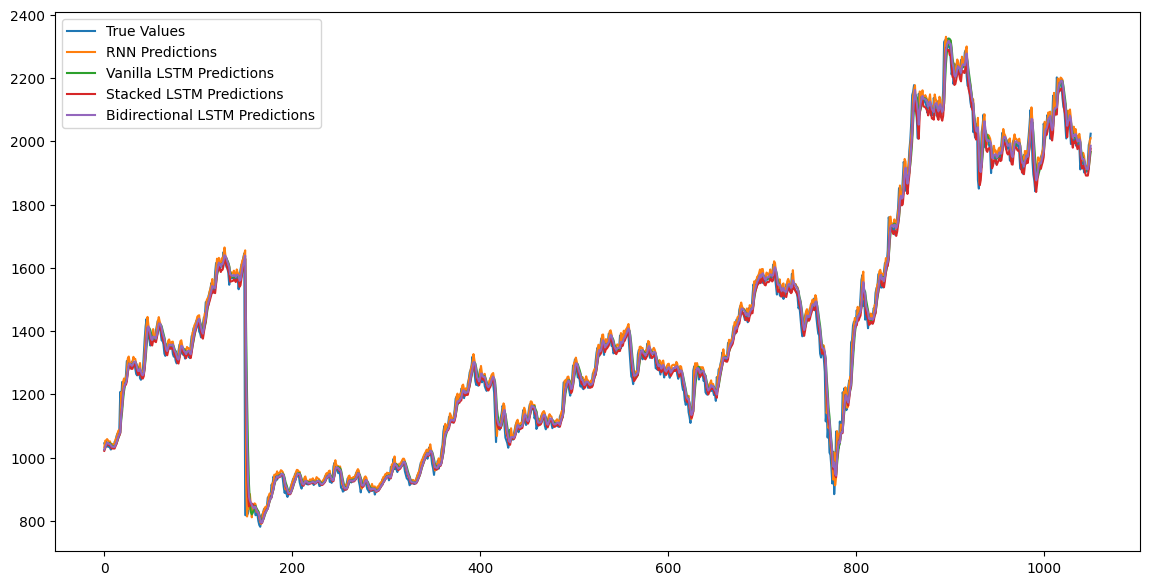

In [28]:
# Plot the results
plt.figure(figsize=(14,7))
plt.plot(y_test_inverse[0], label='True Values')
plt.plot(rnn_predictions[:,0], label='RNN Predictions')
plt.plot(vanilla_lstm_predictions[:,0], label='Vanilla LSTM Predictions')
plt.plot(stacked_lstm_predictions[:,0], label='Stacked LSTM Predictions')
plt.plot(bidirectional_lstm_predictions[:,0], label='Bidirectional LSTM Predictions')
plt.legend()
plt.show()